# Análisis básico de texto: frecuencias, n-gramas y nubes de palabras
## Introducción a las Ciencias Sociales Computacionales
## Facultad de Ciencias Sociales, Universidad de Buenos Aires, 2023
### Juan Manuel Pérez y Rodolfo Elbert

En esta notebook vamos a realizar análisis muy simples sobre noticias 

## Funciones en Python

En la notebook anterior vimos cómo definir variables y cómo operar con ellas. En esta notebook vamos a ver cómo definir funciones. Las funciones son bloques de código que se pueden reutilizar en distintos lugares de un programa.

Podemos pensarlas como una especie de "mini-programas" que reciben ciertos valores de entrada, realizan una serie de operaciones y devuelven un valor de salida. O para los que hayan usado Excel, son como las "macros" que se pueden definir para automatizar tareas.

In [1]:
def sumar_1(x):
    return x + 1

sumar_1(2)

3

In [2]:
def saludar(nombre):
    print("Hola " + nombre)

saludar("Juan")


Hola Juan


In [3]:
def valor_absoluto(x):
    if x >= 0:
        return x
    else:
        return -x

valor_absoluto(-5)

5

## Objetos

En Python, todo es un objeto. Los objetos son estructuras que contienen datos y funciones que operan sobre esos datos. Por ejemplo, un objeto de tipo `str` (string) contiene una cadena de caracteres y funciones que operan sobre esa cadena.

In [4]:
b = True

# b tiene un atributo que es su valor numérico
b.real

1

In [5]:
a = 123.5

# Valor numérico
a.real

123.5

In [6]:
a = "Esto es un string con MAYÚSCULAS"

# Acá llamamos un método
a.lower()

'esto es un string con mayúsculas'

In [7]:
"Facultad de Cs. Exactas de la UBA".replace("Exactas", "Sociales")

'Facultad de Cs. Sociales de la UBA'

In [8]:
b = [1,2,3,4]

# Llamo al método append de la lista b

b.append(0)

b

[1, 2, 3, 4, 0]

In [9]:
# Llamo al método sort de la lista b

b.sort()

b

[0, 1, 2, 3, 4]

In [10]:
b.reverse()

b

[4, 3, 2, 1, 0]

## Tokenización

¿Cómo procesamos el texto? Convirtiéndolo a "palabras" (tokens) y luego contando cuántas veces aparece cada palabra.

¿Cómo funcionan esos algoritmos?

Vamos a usar dos (o tres) paquetes para tokenizar (spanglish) texto:

- `spaCy` 
- `nltk`
- A veces `sklearn`


In [11]:
import spacy
from spacy.lang.es import Spanish

nlp = Spanish()

La función `nlp` nos devuelve un documento que tiene varias propiedades. Una de ellas es `doc.text` que nos devuelve el texto del documento. Otra es `doc.tokens` que nos devuelve los tokens del documento.

In [12]:
doc = nlp("Análisis de textos en Introducción a las Ciencias Sociales Computacionales. Facultad de Cs. Sociales, Universidad de Buenos Aires. Docentes: Dr. Rodolfo Elbert y Dr. Juan Manuel Pérez")

doc.text

'Análisis de textos en Introducción a las Ciencias Sociales Computacionales. Facultad de Cs. Sociales, Universidad de Buenos Aires. Docentes: Dr. Rodolfo Elbert y Dr. Juan Manuel Pérez'

Podemos recorrer el documento con un `for` y acceder a los tokens con `token.text` y a la lematización con `token.lemma_`

In [13]:
for token in doc:
    print(f"{token.text}")

Análisis
de
textos
en
Introducción
a
las
Ciencias
Sociales
Computacionales
.
Facultad
de
Cs
.
Sociales
,
Universidad
de
Buenos
Aires
.
Docentes
:
Dr.
Rodolfo
Elbert
y
Dr.
Juan
Manuel
Pérez


Podemos acceder a los "lemas" de los tokens con `token.lemma_`



In [14]:
for token in doc:
    print(f"{token.lemma_}")

## Stemming

Stemming es un proceso de normalización de palabras. El objetivo es reducir las palabras a su raíz o stem, por ejemplo, reducir "corriendo", "corre", "corrió" a la raíz "corr". Es menos preciso que la lematización, pero más rápido.

In [15]:
# Stemming en español con nltk

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("spanish")

stemmer.stem("computación")

'comput'

In [16]:
stemmer.stem("computar")

'comput'

In [17]:
stemmer.stem("computacional")

'computacional'

No es perfecto 🤷

## Análisis de frecuencias y nubes de palabras

Vamos a calcular las frecuencias de palabras. Para eso, vamos a usar el paquete `sklearn` que tiene una función `CountVectorizer` que nos permite calcular las frecuencias de palabras.



La matriz X es una matriz de documentos x palabras. Cada fila es un documento y cada columna es una palabra. Cada celda es la frecuencia de esa palabra en ese documento.


|   | palabra1 | palabra2 | palabra3 | ... | palabraN |
|---|----------|----------|----------|-----|----------|
| doc1 | 1 | 0 | 0 | ... | 0 |
| doc2 | 0 | 1 | 0 | ... | 0 |
| doc3 | 0 | 0 | 1 | ... | 0 |
| ... | ... | ... | ... | ... | ... |
| docM | 0 | 0 | 0 | ... | 1 |

Este es el modelo "bag of words" (bolsa de palabras). Es un modelo muy simple que no tiene en cuenta el orden de las palabras ni ningún tipo de "sentido" de las cosas.


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

textos = [
    "bolsa de palabras",
    "palabras de bolsa",
    "bolsa es una palabra",
    "palabra es una bolsa",
    "palabra no es una bolsa",
    "bolsa es una bolsa",
    "bolsa es una bolsa y es una palabra",
    "bolsa bolsa bolsa palabra es es una una y",
]

vect = CountVectorizer()

vect.fit(textos)

CountVectorizer()

In [20]:
vect.get_feature_names_out()

array(['bolsa', 'de', 'es', 'no', 'palabra', 'palabras', 'una'],
      dtype=object)

In [21]:
vect.transform(textos).todense()

matrix([[1, 1, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 1, 0],
        [1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 1, 1, 0, 1],
        [2, 0, 1, 0, 0, 0, 1],
        [2, 0, 2, 0, 1, 0, 2],
        [3, 0, 2, 0, 1, 0, 2]])

In [22]:
vect.get_feature_names_out()

array(['bolsa', 'de', 'es', 'no', 'palabra', 'palabras', 'una'],
      dtype=object)

In [23]:
import pandas as pd

columns = vect.get_feature_names_out()

bow_df = pd.DataFrame(
    vect.transform(textos).todense(), columns=vect.get_feature_names_out()
)

bow_df["text"] = textos

bow_df

,bolsa,de,es,no,palabra,palabras,una,text
0,1,1,0,0,0,1,0,bolsa de palabras
1,1,1,0,0,0,1,0,palabras de bolsa
2,1,0,1,0,1,0,1,bolsa es una palabra
3,1,0,1,0,1,0,1,palabra es una bolsa
4,1,0,1,1,1,0,1,palabra no es una bolsa
5,2,0,1,0,0,0,1,bolsa es una bolsa
6,2,0,2,0,1,0,2,bolsa es una bolsa y es una palabra
7,3,0,2,0,1,0,2,bolsa bolsa bolsa palabra es es una una y


## Reducción de vocabulario

Utilizaremos algunas estrategias para reducir el vocabulario:

- Eliminar palabras "vacías" (stopwords)
- Convertir a minúsculas
- Lematizar (reducir palabras a su lema -- a veces un verbo, un sustantivo)



In [24]:


def tokenizer(text):
    """
    Tokenizador "custom" que convierte a minúsculas y hace stemming

    """
    tokens = []

    for token in nlp.tokenizer(text):
        stem = stemmer.stem(token.text.lower())
        tokens.append(stem)
    return tokens


# Lemmatize
vect = CountVectorizer(
    tokenizer=tokenizer,
)
vect.fit(textos)

/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<function tokenizer at 0x7f3e6b0cf2e0>)

In [25]:
import pandas as pd

bow_df = pd.DataFrame(vect.transform(textos).todense(), columns=vect.get_feature_names_out())

bow_df["text"] = textos

bow_df

,bols,de,es,no,palabr,una,y,text
0,1,1,0,0,1,0,0,bolsa de palabras
1,1,1,0,0,1,0,0,palabras de bolsa
2,1,0,1,0,1,1,0,bolsa es una palabra
3,1,0,1,0,1,1,0,palabra es una bolsa
4,1,0,1,1,1,1,0,palabra no es una bolsa
5,2,0,1,0,0,1,0,bolsa es una bolsa
6,2,0,2,0,1,2,1,bolsa es una bolsa y es una palabra
7,3,0,2,0,1,2,1,bolsa bolsa bolsa palabra es es una una y


## TF-IDF

Una forma alternativa de calcular las frecuencias es con TF-IDF. TF-IDF es una medida de la importancia de una palabra en un documento.

TF-IDF es el producto de dos medidas:

- TF (Term Frequency): la frecuencia de una palabra en un documento

- IDF (Inverse Document Frequency): la frecuencia inversa de un documento en una colección de documentos

Podemos escribir la fórmula de TF-IDF como:

$$
\text{TF-IDF}(t,d) = \text{TF}(t,d) \times \text{IDF}(t)
$$

donde $t$ es una palabra y $d$ es un documento.

En algunos casos, $IDF(t)$ se calcula como el logaritmo de la frecuencia inversa

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vect = TfidfVectorizer(
    norm=None, # no normalizo cada documento
)

"""
Una lista de ejemplos para tf-idf
"""
textos = [
    "La bolsa es de palabras",
    "La bolsa es de Argentina",
    "La Argentina es una bolsa de país",
    "Una bolsa no es un país",
    "La Argentina no es una bolsa",
    "La bolsa es una bolsa",
    "La bolsa es una bolsa y es una palabra",
    "Uruguay es un país",
    "La bolsa es de Uruguay",
    "Toman mate Argentina Uruguay y Paraguay",
]

vect.fit(textos)


bow_df = pd.DataFrame(vect.transform(textos).todense(), columns=vect.get_feature_names_out())

bow_df["text"] = textos

bow_df

,argentina,bolsa,de,es,la,mate,no,palabra,palabras,paraguay,país,toman,un,una,uruguay,text
0,0.000000,1.200671,1.788457,1.09531,1.318454,0.000000,0.000000,0.000000,2.704748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,La bolsa es de palabras
1,1.788457,1.200671,1.788457,1.09531,1.318454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,La bolsa es de Argentina
2,1.788457,1.200671,1.788457,1.09531,1.318454,0.000000,0.000000,0.000000,0.000000,0.000000,2.011601,0.000000,0.000000,1.606136,0.000000,La Argentina es una bolsa de país
3,0.000000,1.200671,0.000000,1.09531,0.000000,0.000000,2.299283,0.000000,0.000000,0.000000,2.011601,0.000000,2.299283,1.606136,0.000000,Una bolsa no es un país
4,1.788457,1.200671,0.000000,1.09531,1.318454,0.000000,2.299283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606136,0.000000,La Argentina no es una bolsa
5,0.000000,2.401341,0.000000,1.09531,1.318454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606136,0.000000,La bolsa es una bolsa
6,0.000000,2.401341,0.000000,2.19062,1.318454,0.000000,0.000000,2.704748,0.000000,0.000000,0.000000,0.000000,0.000000,3.212272,0.000000,La bolsa es una bolsa y es una palabra
7,0.000000,0.000000,0.000000,1.09531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.011601,0.000000,2.299283,0.000000,2.011601,Uruguay es un país
8,0.000000,1.200671,1.788457,1.09531,1.318454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.011601,La bolsa es de Uruguay
9,1.788457,0.000000,0.000000,0.00000,0.000000,2.704748,0.000000,0.000000,0.000000,2.704748,0.000000,2.704748,0.000000,0.000000,2.011601,Toman mate Argentina Uruguay y Paraguay


In [24]:
import pandas as pd
from datasets import load_dataset


ds = load_dataset("finiteautomata/news-argentina", split="train")

df = ds.to_pandas()

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/73423 [00:00<?, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset

In [ ]:
ds[0]["comments"]

In [28]:
df.head(10)

,tweet_id,text,title,url,user,body,created_at,comments
0,1376941547602739200,El dólar blue cada vez más barato: cae a $ 141...,El dólar blue cada vez más barato: cayó a $ 14...,https://www.clarin.com/economia/dolar-blue-vez...,clarincom,Este martes el dólar blue retomó su tendencia ...,2021-03-30 16:57:01,"[{'created_at': '2021-03-30T16:58:04Z', 'text'..."
1,1376945423273840640,Venezuela le declara la guerra a Facebook por ...,Venezuela le declara la guerra a Facebook por ...,https://www.clarin.com/tecnologia/venezuela-de...,clarincom,El presidente Nicolás Maduro le declaró la gue...,2021-03-30 17:12:25,"[{'created_at': '2021-03-30T17:14:14Z', 'text'..."
2,1376946868161220608,Polémica: un proyecto K propone multas millona...,Polémica: un proyecto K propone multas millona...,https://www.clarin.com/politica/polemica-proye...,clarincom,Mientras el presidente Alberto Fernández decid...,2021-03-30 17:18:10,"[{'created_at': '2021-03-30T17:19:22Z', 'text'..."
3,1376948553977896960,"'Ser argentino' o 'dejar de serlo', la insólit...",Mendoza: preparan un insólito plebiscito para ...,https://www.clarin.com/politica/-argentino-dej...,clarincom,"A mediados de 2020, el ex gobernador Alfredo C...",2021-03-30 17:24:52,"[{'created_at': '2021-03-30T17:25:43Z', 'text'..."
4,1376949422941220864,"El tamaño de los penes, cada vez más chicos po...","El tamaño de los penes, cada vez más chicos po...",https://www.cronica.com.ar/info-general/Los-ta...,cronica,Una científica ambiental aseguró que los penes...,2021-03-30 17:28:19,"[{'created_at': '2021-03-30T17:29:50Z', 'text'..."
5,1376954638654668800,El ministro de Trabajo rechazó la exención de ...,El ministro de Trabajo rechazó la exención de ...,https://www.clarin.com/politica/ministro-traba...,clarincom,En el arranque del debate de Ganancias en el S...,2021-03-30 17:49:03,"[{'created_at': '2021-03-30T17:50:16Z', 'text'..."
6,1376957714887290880,Espionaje: la Cámara de Casación rechazó el pl...,Espionaje: la Cámara de Casación rechazó el pl...,https://www.lanacion.com.ar/politica/espionaje...,LANACION,La Cámara de Casación Penal rechazó hoy el pla...,2021-03-30 18:01:16,"[{'created_at': '2021-03-30T18:03:06Z', 'text'..."
7,1376959569218404352,Desconsolado llanto de Cinthia Fernández al de...,Desconsolado llanto de Cinthia Fernández al de...,https://www.clarin.com/fama/desconsolado-llant...,clarincom,La entrevista que Matías Defederico (31) dio e...,2021-03-30 18:08:38,"[{'created_at': '2021-03-30T18:15:52Z', 'text'..."
8,1376961991823200256,Mauricio Macri fue al Conurbano y agita la int...,Mauricio Macri fue al Conurbano y agita la int...,https://www.clarin.com/politica/mauricio-macri...,clarincom,En línea con los últimos movimientos de Patric...,2021-03-30 18:18:16,"[{'created_at': '2021-03-30T18:19:52Z', 'text'..."
9,1376963840278208512,PAMI: un grupo de jubilados marcha en rechazo ...,PAMI: un grupo de jubilados marcha en rechazo ...,https://www.lanacion.com.ar/politica/pami-un-g...,LANACION,"Desde hoy, un grupo de jubilados se manifiesta...",2021-03-30 18:25:36,"[{'created_at': '2021-03-30T18:27:39Z', 'text'..."


- `user` es una variable que la podemos considerar categórica: toma un rango de valores finito: `infobae` `clarincom` `LANACION` `pagina12` `cronica` `laderechadiario` `izquierdadiario` 
- `text` tiene el tweet asociado a la noticia
- `title` tiene el título de la noticia
- `created_at` tiene la fecha de la noticia (o del tweet)
- `body` tiene el cuerpo de la noticia

In [29]:
df["user"].value_counts()

infobae            25720
clarincom          19524
LANACION           18306
pagina12            4107
cronica             4070
laderechadiario     1523
izquierdadiario      173
Name: user, dtype: int64

Con el método `loc` podemos acceder elementos de un dataframe de acuerdo a su clave. En este caso, el dataframe no tiene clave, así que tiene una clave por defecto que es el número de fila.

Análogamente, tenemos el método `.iloc` que nos permite acceder a los elementos de un dataframe de acuerdo a su posición. Justo en este caso, el dataframe tiene como clave el número de fila, así que `.loc` y `.iloc` son equivalentes.




In [30]:
import pandas as pd

pd.options.display.max_colwidth = 200
df.iloc[0]

tweet_id                                                                                                                                                                                          1376941547602739200
text                                                                                                    El dólar blue cada vez más barato: cae a $ 141 y está 20 pesos abajo del dólar ahorro https://t.co/ebO2TRMHB5
title                                                                                                                          El dólar blue cada vez más barato: cayó a $ 141 y está 20 pesos abajo del dólar ahorro
url                                                https://www.clarin.com/economia/dolar-blue-vez-barato-cae-141-20-pesos-abajo-dolar-ahorro_0_WpZyN1FTe.html?utm_medium=Social&utm_source=Twitter#Echobox=1617123421
user                                                                                                                                            

## Análisis de palabras por título

Hay algunos títulos NA. Quedémonos con los que tienen título.

In [31]:
df["title"].notna()

0        True
1        True
2        True
3        True
4        True
         ... 
73418    True
73419    True
73420    True
73421    True
73422    True
Name: title, Length: 73423, dtype: bool

In [32]:
df_titulo = df[df["title"].notna()]



In [33]:
vectorizer = CountVectorizer()

# Elimino los ejemplos que no tienen título

vectorizer.fit(df_titulo["title"])

X = vectorizer.transform(df_titulo["title"])

X.shape

(67382, 34672)

Hay un montón de palabras! Veamos cuántas veces aparece cada una



In [34]:
# Sumo sobre el eje 0 (columnas)

bow_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
bow_df

,00,000,0000,007,01,014,02,026,027,03,...,únicamente,únicas,único,únicos,úrsula,úrsulas,útero,útil,útiles,ła
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ejercicio (Ayuda ChatGPT!)

Calcular la cantidad de apariciones total por palabra. 

In [35]:


freq_df = bow_df.sum(axis=0)

freq_df

00           1
000        907
0000         2
007          1
01           9
          ... 
úrsulas      2
útero        3
útil         5
útiles       1
ła           1
Length: 34672, dtype: int64

<Axes: >

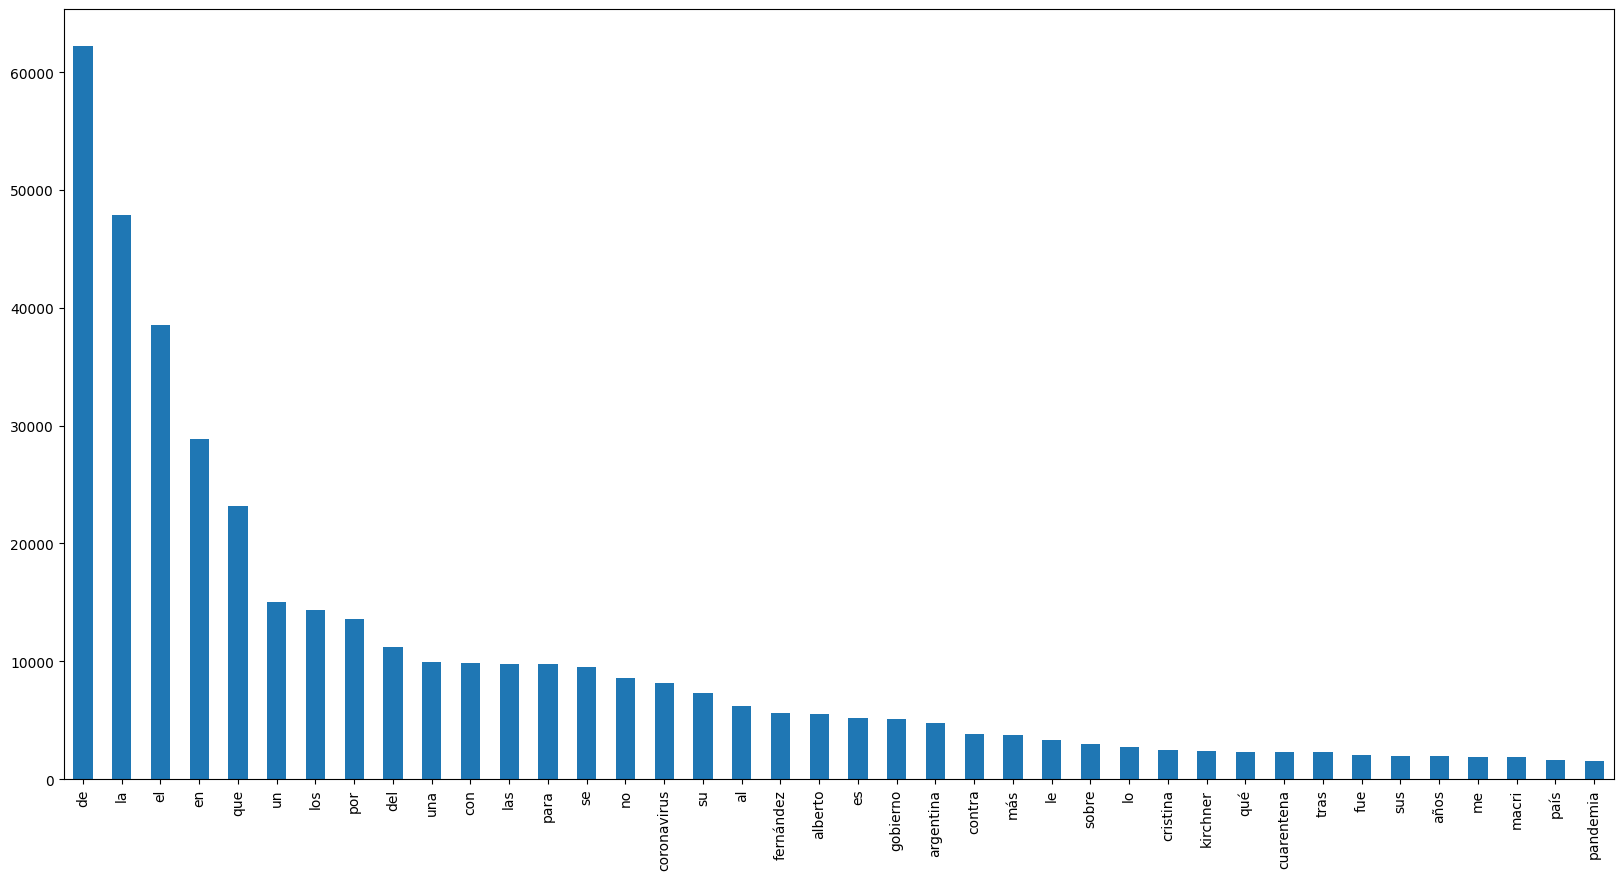

In [36]:
#Histograma de las 100 palabras más frecuentes
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))

freq_df.sort_values(ascending=False).head(40).plot.bar(x="word", y="freq")

Ley de Zipf: la frecuencia de una palabra es inversamente (y exponencialmente) proporcional a su rango en la lista de frecuencias ordenadas.

¿Cuántas palabras aparecen 3 o menos veces?

In [37]:
freq_df[freq_df <= 3]

00            1
0000          2
007           1
014           1
026           1
             ..
únicamente    2
úrsulas       2
útero         3
útiles        1
ła            1
Length: 20009, dtype: int64

De las 33k, 19k aparecen 1, 2 o 3 veces

Para hacer algo más representativo, sacamos:

* las palabras que aparecen 3 o menos veces
* las palabras que aparecen en más del 40% de los documentos

In [38]:
# Stopwords de español
import nltk

from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords.words("spanish")

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/jmperez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

Vamos a reducir un poco la cantidad de palabras:

- Sacamos las "stopwords" 
- Usamos nuestra función especial de tokenización (que )


In [39]:
vectorizer = CountVectorizer(
    min_df=4,
    max_df=0.45,
    stop_words=stopwords.words("spanish"),
    #strip_accents='unicode',
    tokenizer=tokenizer,
)

vectorizer.fit(df_titulo["title"])


/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien'

CountVectorizer(max_df=0.45, min_df=4,
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                tokenizer=<function tokenizer at 0x7f3e6b0cf2e0>)

In [40]:
X.shape

(67382, 34672)

In [41]:

X = vectorizer.transform(df_titulo["title"])

df_bow = pd.DataFrame(
    X.todense(),
    columns=vectorizer.get_feature_names_out())

df_bow

,!,"""",#,$,%,&,','',(,),...,°,¿,ñoquis,‎lo,‘,’,“,”,…,″¿vos
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
67378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [42]:
# Ponemos la etiqueta del medio
df_bow["user"] = df_titulo["user"]

In [43]:
# Palabras más frecuentes por cada usuario

df_bow.groupby("user").sum().T.sort_values("clarincom", ascending=False).head(30)

user,LANACION,clarincom,cronica,infobae,izquierdadiario,laderechadiario,pagina12
",",4235,5197,1065,6858,41,202,556
“,3621,4532,970,5936,40,181,492
”,3543,4477,958,5823,40,178,482
"""",2631,3281,723,4403,32,97,381
par,2131,2700,577,3531,23,100,272
coronavirus,1770,2269,437,2741,12,112,176
argentin,1266,1644,383,2173,7,63,174
fernandez,1220,1507,312,1914,8,54,151
albert,1205,1475,312,1911,8,57,144
gobiern,1044,1378,288,1841,6,44,152


¿Podemos mejorar el tokenizado? 

## Nube de palabras


In [44]:
df.shape

(73423, 8)

In [45]:

df_derecha = df[df["user"] == "laderechadiario"]


df_derecha.shape

(1523, 8)

In [46]:
# Nube de palabras

from wordcloud import WordCloud


WordCloud?

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

In [47]:
import unicodedata

def remove_accents(text):
    return unicodedata.normalize("NFD", text).encode('ascii', 'ignore').decode("utf-8")

remove_accents("áéíóú")

'aeiou'

In [48]:


ignore = [remove_accents(word) for word in stopwords.words("spanish")]

ignore += ["https", "t", "co"]

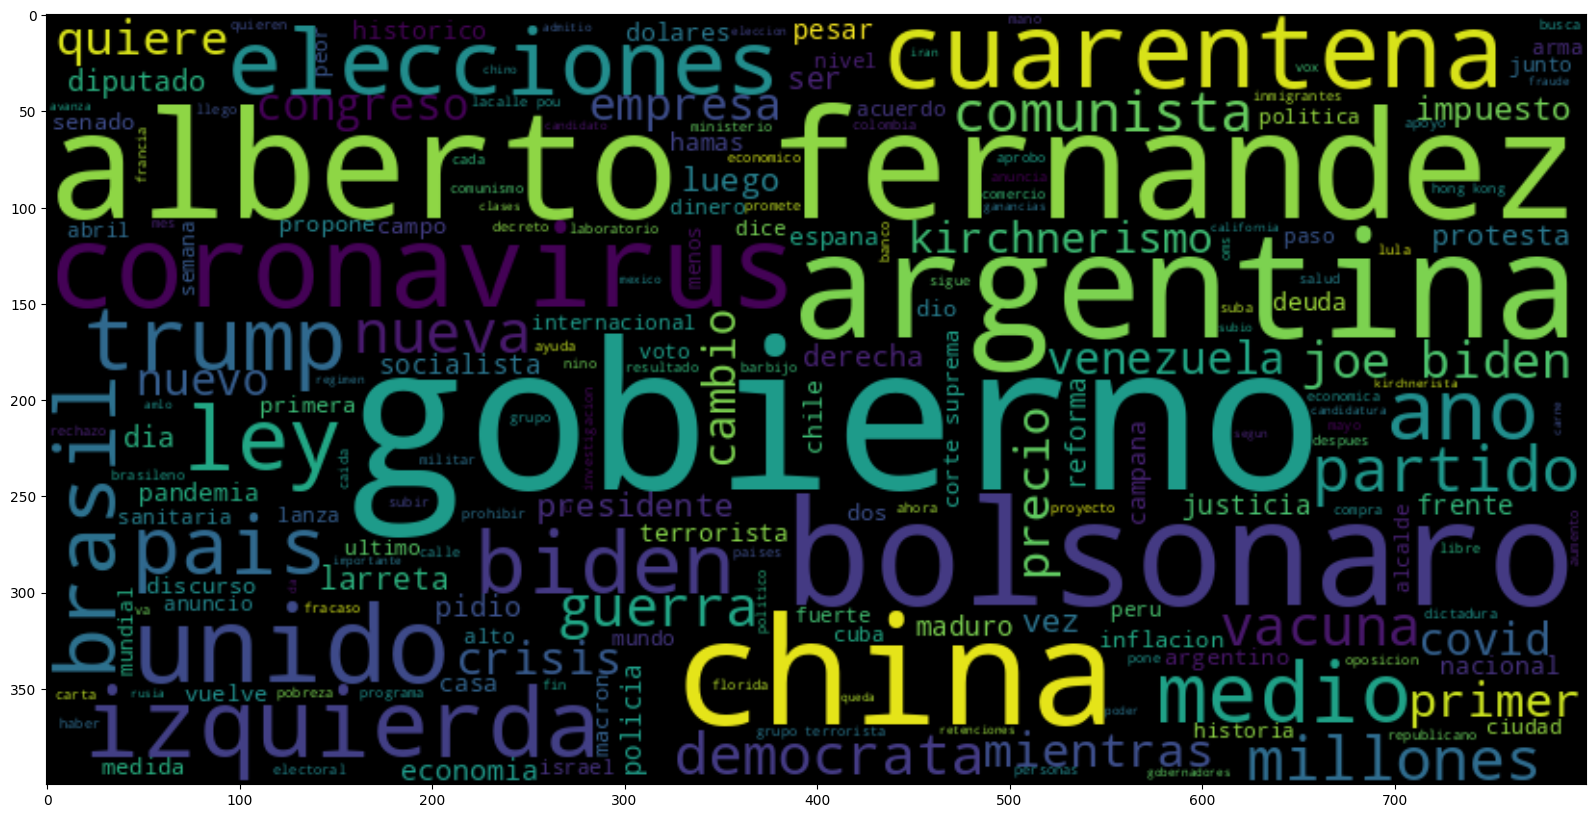

In [49]:


text_col = df_derecha[df_derecha["title"].notna()]


text = " ".join(text_col["title"]).lower()
text = remove_accents(text)


wordcloud = WordCloud(width=800, height=400, stopwords=ignore).generate(text)

plt.figure(figsize=(20, 10))

plt.imshow(wordcloud, interpolation="bilinear")

## Detección de palabras salientes

¿Cómo podemos detectar palabras salientes para los distintos medios?

- Por frecuencias (ya lo vimos antes). Buscamos las palabras más frecuentes (haciendo recorte de stopwords y otras palabras que no nos interesan)
- TF-IDF
- PMI

Idea TF-IDF: Calculamos la matriz de TF-IDF por palabra y por medio. Luego, para cada medio, buscamos las palabras con mayor TF-IDF, sumando los TF-IDF de cada palabra en cada documento.

In [50]:
# Tf-Idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    min_df=4,
    #max_df=0.45,
    stop_words=stopwords.words("spanish"),
    #strip_accents='unicode',
    tokenizer=tokenizer,
)

vectorizer.fit(df_titulo["title"])

X = vectorizer.transform(df_titulo["title"])

df_tf_idf = pd.DataFrame(
    X.todense(),
    columns=vectorizer.get_feature_names_out())

df_tf_idf["medio"] = df_titulo["user"]


/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien'

In [51]:
# Get tf-idf values per word
import numpy as np

word_values = df_tf_idf.sum(axis=0)
word_values.sort_values(ascending=False)[:50]


/users/jmperez/tmp/ipykernel_1950723/161830215.py:4: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  word_values = df_tf_idf.sum(axis=0)


:              2795.921758
,              2214.686817
"              2009.357601
“              1955.788624
”              1933.400546
par            1451.805992
coronavirus    1359.994659
argentin       1104.076957
fernandez      1035.793306
albert         1031.748595
gobiern         956.764824
hac             930.085732
vacun           825.086090
period          796.067105
contr           762.769421
mas             739.573940
com             654.291067
sobr            600.707243
cristin         568.557714
nuev            566.549913
cas             545.627788
kirchn          533.448979
cuarenten       527.771035
¿               518.495217
?               511.804826
tras            479.454002
pais            472.464759
.               469.438709
tod             467.537179
...             460.004314
ser             452.141401
macri           439.511008
pid             418.159627
años            416.144176
tien            389.610575
pandemi         381.178321
president       377.527664
m

In [52]:
# Segmentado por medio

df_tf_idf.groupby("medio").sum().T.sort_values("laderechadiario", ascending=False).head(30)

medio,LANACION,clarincom,cronica,infobae,izquierdadiario,laderechadiario,pagina12
:,588.260060,739.103834,159.546865,975.523336,5.652075,27.238836,79.910375
",",474.322940,585.733469,119.093669,771.881144,4.290392,22.785512,62.901706
“,412.670635,516.756212,111.188730,677.640111,4.472394,20.786384,56.602668
”,406.248125,513.472477,110.683467,668.923397,4.504311,20.621192,55.676476
coronavirus,296.418814,379.059136,73.045480,458.873778,2.049723,18.688434,30.416990
"""",422.135937,530.891185,116.348529,709.396160,5.082267,14.952954,60.998393
par,305.646630,388.886508,82.893042,504.643229,3.198807,14.321371,38.890202
argentin,226.526625,295.701087,66.454703,386.179210,1.469155,11.062645,30.665478
albert,222.690593,274.412211,57.952453,355.115836,1.450885,10.314672,26.701972
fernandez,221.924544,278.460436,57.927337,350.754769,1.445165,9.812421,27.842021


In [53]:
for medio in df_titulo["user"].unique():
    print(medio)
    vectorizer = TfidfVectorizer(
        min_df=4,
        #max_df=0.45,
        stop_words=stopwords.words("spanish"),
        #strip_accents='unicode',
        tokenizer=tokenizer,
    )
    df_medio = df_titulo[df_titulo["user"] == medio]
    vectorizer.fit(df_medio["title"])

    X = vectorizer.transform(df_medio["title"])

    df_tf_idf = pd.DataFrame(
        X.todense(),
        columns=vectorizer.get_feature_names_out())


    word_values = df_tf_idf.sum(axis=0)

    print(word_values.sort_values(ascending=False)[:50])
    print("\n")

clarincom


/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien'

:              845.154575
,              716.971036
“              699.462472
”              699.333802
coronavirus    489.844215
par            474.858917
argentin       358.307554
albert         333.665163
fernandez      324.765558
gobiern        313.209692
contr          264.214743
vacun          247.256023
mas            244.364425
cristin        235.817883
kirchn         210.770903
com            190.133938
cas            186.447056
nuev           174.158021
?              166.226417
¿              165.697196
cuarenten      162.069052
sobr           161.252138
tras           156.479489
pid            148.690013
tod            142.516490
pais           134.539685
macri          131.207863
ser            129.632934
muert          128.899946
ciud           124.916722
millon         120.854157
años           118.595396
per            115.859479
critic         114.397205
cambi          113.229999
tien           111.930823
pandemi        110.949017
president      110.721974
dia         

/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien'

"              383.871067
:              193.505126
,              149.361435
par             95.372260
coronavirus     95.251457
albert          69.254465
fernandez       62.045812
?               61.328181
¿               61.328181
argentin        58.463091
vacun           46.773542
contr           45.317863
cuarenten       42.190110
com             41.511600
mas             40.801890
cas             39.577354
tras            39.316208
macri           38.403601
hij             38.373319
mur             38.063125
ser             37.035844
años            36.265570
tien            35.773229
sobr            35.697445
nuev            34.555109
mat             33.953027
tod             32.688743
hac             30.539987
rob             29.761400
pais            29.471835
pid             29.235451
ten             28.519694
muert           28.383095
dos             28.208006
rial            27.698096
vide            27.053747
kirchn          26.406732
muj             26.004691
gobiern     

/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien'

"              979.907392
:              773.470141
,              581.471579
coronavirus    381.017163
par            323.721671
“              319.654828
”              318.184142
.              312.737826
argentin       289.943734
fernandez      258.755751
albert         243.874709
vacun          220.545418
gobiern        216.707962
sobr           193.652626
contr          165.657175
mas            159.691018
com            154.955407
cristin        147.699306
kirchn         143.855729
nuev           140.619863
?              139.753219
¿              139.081011
tras           135.717268
cas            133.262728
pais           120.747656
cuarenten      111.279898
critic         109.910029
macri          107.568208
tod            106.105075
ser             99.071362
juan            98.452669
pid             97.693230
dij             97.075350
dieg            94.641816
años            94.418524
muert           86.640180
tien            85.606594
president       85.436626
luis        

/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien'

...              182.617513
"                142.649379
:                134.751347
,                 82.746905
albert            58.394940
fernandez         55.420388
macri             47.948434
par               46.049708
|                 43.762443
coronavirus       42.929136
sobr              36.158869
contr             31.370172
vacun             31.264899
“                 28.659653
¿                 28.546797
gobiern           27.082622
com               26.956935
argentin          24.687282
maurici           22.872963
mas               21.432775
cristin           19.780076
odi               18.397122
nuev              17.964503
kicillof          17.823817
cas               17.746017
hac               17.671749
?                 17.337500
kirchn            17.332648
denunci           17.181526
ser               16.226975
anticuarenten     16.200710
porteñ            15.754202
axel              15.597067
tod               14.793718
pandemi           14.671622
president         14

/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien'

"              39.775566
:              39.532902
,              34.700088
par            30.301125
gobiern        19.287393
mas            16.152372
argentin       15.844939
coronavirus    15.654749
contr          14.045046
chin           14.029308
albert         13.511299
bolsonar       13.468890
fernandez      13.407115
unid           12.990212
nuev           11.933297
bid            11.204953
cuarenten      11.050342
trump          10.938757
comun          10.870639
pais           10.132115
izquierd       10.130452
eleccion        9.755309
econom          9.673758
com             9.071187
medi            8.951419
kirchner        8.913765
derech          8.749658
tod             8.581149
part            8.413328
ley             8.375392
brasil          8.050770
sub             7.938458
social          7.923133
quier           7.821623
millon          7.720600
sobr            7.624906
democrat        7.346519
per             7.214999
pid             7.117912
president       7.042859


/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien'

:              1011.708687
“               875.919816
”               863.021954
,               824.768733
hac             737.791831
period          709.467001
par             579.361047
argentin        425.342253
coronavirus     400.558494
gobiern         400.106360
fernandez       385.625367
albert          381.250338
vacun           311.953130
mas             303.486403
contr           285.729504
com             280.247582
nuev            225.664531
cuarenten       222.300607
sobr            205.821729
cas             199.537171
pais            198.165359
ser             193.982141
tod             190.046208
años            179.371061
pandemi         171.505859
covid-19        170.497431
president       165.588753
tras            165.092511
tien            163.585740
cristin         160.543039
kirchn          154.791734
?               150.493497
¿               149.483298
pid             149.477941
volv            146.846549
si              146.551067
millon          142.978451
m

/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/users/jmperez/projects/icsc-uba-2023/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien'